### 🎡 Brain MRI Images for Brain Tumor Detection

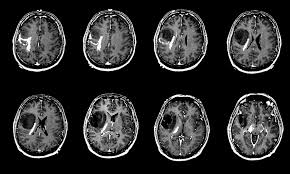

### Import Libraries

### what is fast book
FastBook is a free, open-source library for deep learning in Python. It is built on top of the PyTorch library and provides a high-level API for training and evaluating deep learning models. FastBook is designed to be easy to use, even for beginners, and it provides a number of features that make it ideal for developing and deploying deep learning models in the real world.

Some of the key features of FastBook include:

- A simple and intuitive API for training and evaluating deep learning models
- A wide range of pre-trained models that can be used for a variety of tasks, such as image classification, object detection, and natural language processing
- A number of tools for data preprocessing and visualization
- A focus on performance and scalability

FastBook is used by a wide range of people and organizations, including researchers, students, and professionals in the industry. It is a popular choice for developing deep learning models for a variety of tasks, such as medical imaging, computer vision, and natural language processing.

#### Here are some examples of how FastBook can be used:

- To train a deep learning model to classify images of cats and dogs
- To train a deep learning model to detect objects in images, such as cars, pedestrians, and traffic signs
- To train a deep learning model to translate text from one language to another
- To train a deep learning model to generate text, such as poems or code
- FastBook is a powerful and versatile tool for deep learning. It is easy to use and provides a number of features that make it ideal for developing and deploying deep learning models in the real world.

In [ ]:
!pip install -Uqq fastbook
import fastbook


import warnings
warnings.filterwarnings('ignore')


In [47]:
import fastbook
from fastbook import *

### -Uqq fastbook

- The -Uqq flag tells pip to upgrade fastbook to the latest version quietly. This means that pip will not print any output to the console unless there is an error. This is useful for when you are running a script that needs to install fastbook, but you do not want to see any output from the installation process.

#### Why are you using this in this application specifically?

- In this application, you are using fastbook to create a data block for your brain MRI images. A data block is a way of representing your data in a way that is compatible with fastbook's deep learning models. Data blocks allow you to specify how your data should be loaded, preprocessed, and split into training and validation sets.

### Dataset

In [48]:
path = Path('C:\\Users\\mahen\\Downloads\\dataset brain mri')



### Observation

the above path conatins category of images which are 
- **Yes category** - it means these images have the brain tumor
- **No category** - it means these images dont have the brain tumor

### 👉 How many categories in our dataset

In [49]:
# creating a labels for our images which are yes and  no and we will assign this labels according to the images which are present in yes folder or not folder this we can see in the input section where we can able to see or able to download the data 
object_types='no','yes' #  assigned values to the tuple in the object_types  

# two types of category

In [50]:
object_types 

('no', 'yes')

### 📒 Creating DataBlock

**What is a data block?**

A data block is a Python object that represents a collection of data. It contains the following information:

The type of data that the data block contains (e.g., images, text, etc.)
How to load the data from disk
How to preprocess the data (e.g., resize images, normalize text, etc.)
How to split the data into training and validation sets

In [51]:

Object_types=DataBlock(
             blocks=(ImageBlock,CategoryBlock), # blocks: This argument specifies the type of data that the data block contains. data types are text,images  In this case, the data block contains images and categories.
             get_items=get_image_files,# This argument specifies how to load the data from disk. The get_image_files function loads the images from the directory specified by the path variable.
             splitter=RandomSplitter(valid_pct=0.2,seed=42),# This argument specifies how to split the data into training and validation sets. The RandomSplitter splits the data randomly, with 20% of the data going into the validation set.
             get_y=parent_label, # get_y: This argument specifies how to extract the labels for the images. The parent_label function extracts the label from the parent directory of the image file.
             item_tfms=Resize(128)) # item_tfms: This argument specifies how to preprocess the data. In this case, the Resize transform resizes the images to a size of 128x128 pixels.

# Once the data block has been created, you can use it to train a deep learning model to detect brain tumors in MRI images.


#The most important parameter valid_pct=0.2. 
#This hold out 20% of the data.
#This 20% of the data is called the validation set;
#the remaining 80% is called the training set.
#seed=42 means same validation set every time 
#so if accuracy improve means model improve not because of data

In [52]:
dls = Object_types.dataloaders(path) # here iam loading the images whicha re presemt in the path to the Object_types varaible which a datablock which it allows to perfom how to load ,preprocess and split our images  


Here **dls** means data loader vaiable which it iterates over the dataset in a batch wise then that could helps us model to feed the input data in a batch wise 


- The dls=Object_types.dataloaders(path) line of code creates a DataLoader object for the brain MRI images in the path directory. A DataLoader object is a way of iterating over a dataset in batches. This is useful for training deep learning models, as it allows you to feed the model batches of data at a time, which is more efficient than feeding the model individual data points.

#### The Object_types.dataloaders() method takes two arguments:

- path: The directory containing the brain MRI images.
- bs: The batch size. This is the number of images that will be included in each batch.

### We see our dataset images 🙌👍

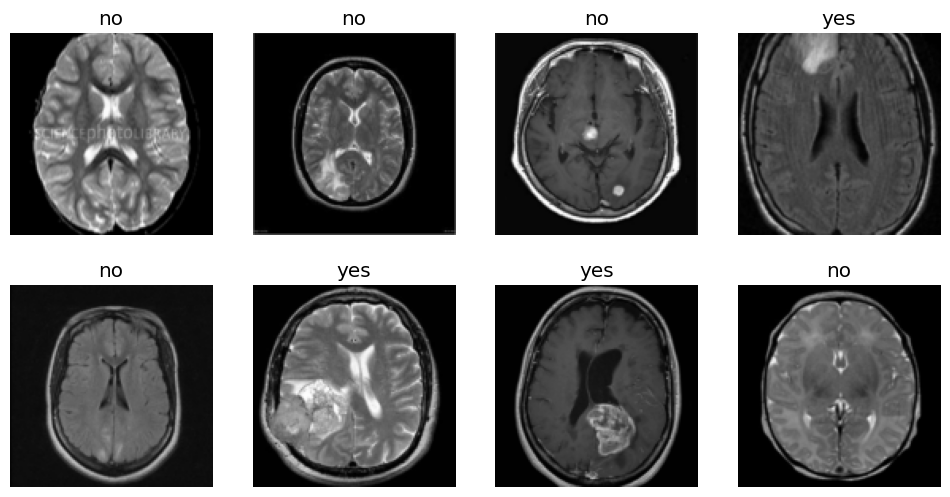

In [53]:
dls.valid.show_batch(max_n=8,nrows=2) # validation dataset contains the 20 % of the images and iam going to show the some sample of images 

- The dls.valid.show_batch(max_n=8, nrows=2) line of code visualizes a batch of images from the validation set. The following arguments are passed to the show_batch() method:

- **max_n:** The maximum number of images to visualize. In this case, the code will visualize at most 8 images.
- **nrows:** The number of rows in the visualization. In this case, the code will visualize at most 2 images per row.

### why we are storing our images which are yes or no labels in validation set 


We store our images with yes or no labels in the validation set because we want to evaluate the performance of our model on data that it has not seen before. The validation set is used to tune the model's hyperparameters and to assess the model's generalization ability, i.e., how well the model performs on new data that it has not seen before.

If we did not store our images with yes or no labels in the validation set, then we would not be able to evaluate the model's performance on new data. This is because we would not know the true labels of the images in the validation set.

#### Here is an example:

Suppose we are training a deep learning model to detect brain tumors in MRI images. We have a dataset of MRI images, some of which contain brain tumors and some of which do not. We split the dataset into a training set and a validation set.

During training, we feed the training images to the model and train the model to predict whether or not each image contains a brain tumor. Once the model is trained, we evaluate the model's performance on the validation set.

To evaluate the model's performance on the validation set, we need to know the true labels of the images in the validation set. This is why we store our images with yes or no labels in the validation set.

By evaluating the model's performance on the validation set, we can get an estimate of how well the model will perform on new data that it has not seen before. This information can be used to tune the model's hyperparameters and to select the best model for deployment.

### Squish method
👉 We resize our datasets by using **Squish method** and making all the same size


The Squish method is a way of resizing images by maintaining the aspect ratio of the image. This is useful for resizing images for deep learning models, as it ensures that the model does not see any distorted images.

The Squish method works by first calculating the maximum width and height of the image that will fit within the desired output size. The image is then scaled so that it fits within the maximum width and height, while maintaining the aspect ratio of the image.

### Here are some of the benefits of resizing images using the Squish method:

- It maintains the aspect ratio of the image, which is important for preventing distortion.
- It ensures that all of the input images are the same size, which is required by deep learning models.
- It can improve the performance of deep learning models by reducing the amount of computation required to process the images.
- Overall, the Squish method is a good way to resize images for deep learning models. It maintains the aspect ratio of the image, ensures that all of the input images are the same size, and can improve the performance of deep learning models.

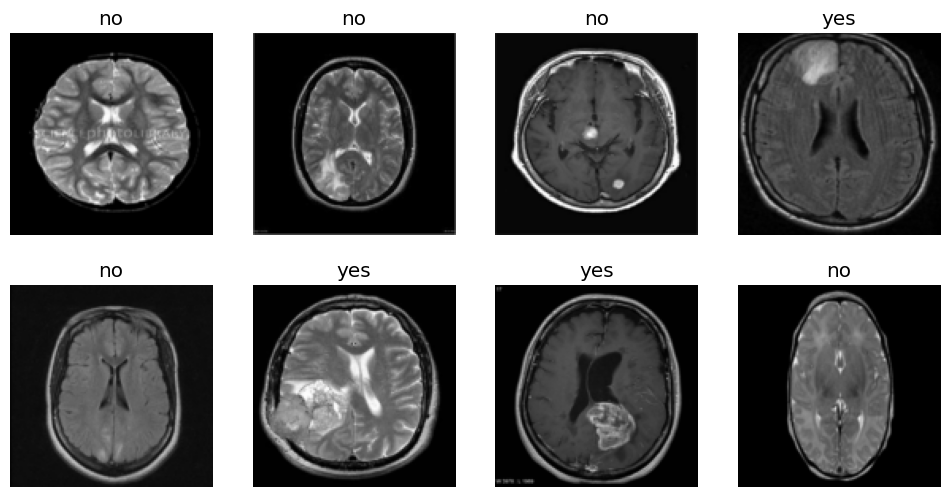

In [54]:
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish)) # This line of code creates a new DataBlock object from the existing DataBlock object, but with the addition of a new Resize transform. The Resize transform resizes the images to a width and height of 128 pixels using the Squish method.
dls=Object_types.dataloaders(path) # This line of code creates a DataLoader object for the resized images in the path directory. The DataLoader object is used to load the resized images in batches, which is more efficient for training deep learning models than loading the images one at a time.
dls.valid.show_batch(max_n=8,nrows=2) # This line of code visualizes a batch of images from the validation set. The max_n argument specifies the maximum number of images to visualize, and the nrows argument specifies the number of rows in the visualization.


### Random Resize Crop
Here we are **crop our images from different angles** and we take randam parts of same image
- This will help us to avoid the overfitting 🤴


- Random Resize Crop (RRC) is a data augmentation technique that randomly resizes and crops images. This helps to avoid overfitting by making the model more robust to variations in the input data.

- RRC works by first randomly resizing the image to a size within a specified range. The image is then randomly cropped to a desired size. This process can be repeated multiple times to generate multiple augmented images from the original image.

### Benefits of Random Resize Crop

- Reduces overfitting by making the model more robust to variations in the input data.
- Improves the performance of deep learning models by increasing the amount of training data.
- Can be used to generate new training data from existing data, which can be useful for datasets that are small or difficult to collect.

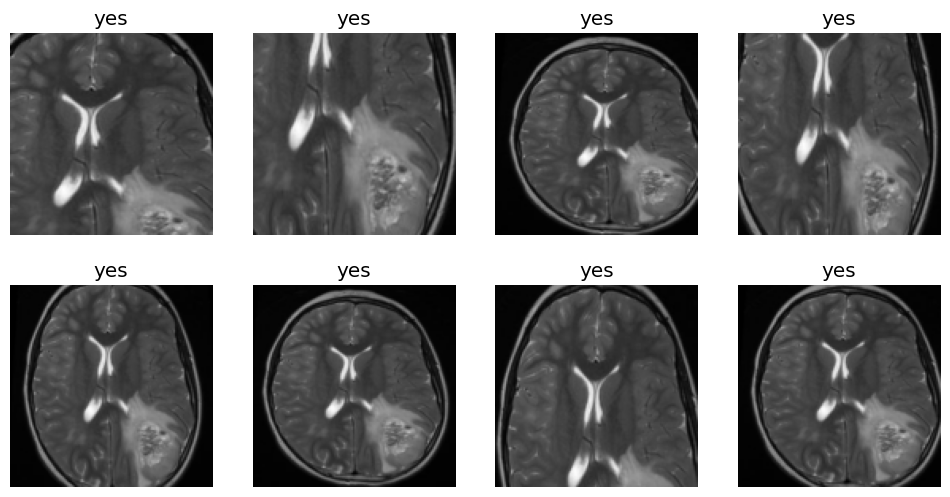

In [55]:
Object_types=Object_types.new(item_tfms=RandomResizedCrop(128,min_scale=0.3)) #This line of code creates a new DataBlock object from the existing DataBlock object, but with the addition of a new RandomResizedCrop transform. The RandomResizedCrop transform randomly resizes and crops the images to a size of 128 pixels, with a minimum scale of 0.3.
dls=Object_types.dataloaders(path,bs=64) # This line of code creates a DataLoader object for the augmented images in the path directory. The DataLoader object loads the augmented images in batches of 64 images.
dls.train.show_batch(max_n=8,nrows=2,unique=True) # This line of code visualizes a batch of images from the training set. The max_n argument specifies the maximum number of images to visualize, the nrows argument specifies the number of rows in the visualization, and the unique=True argument ensures that no image is visualized more than once.

The batch size is by default bs = 64. you can change that value for a lower one, it will also work. when bs = 64 is not working

dls = Object_types.dataloaders(path,bs=5)

### resnet18 (NNs)
We are using accuracy matrix there are other matrices also you can check official fastai documentation

### What is ResNet18?

- ResNet18 is a deep convolutional neural network (CNN) that was first proposed by He et al. in 2016. It is one of the most popular CNN architectures, and is widely used for image classification, object detection, and other image-related tasks.

- ResNet18 is a residual network, which means that it uses residual connections to bypass some of the layers in the network. This makes the network more efficient and less prone to overfitting.

- ResNet18 has 18 convolutional layers, 1 pooling layer, and 1 fully connected layer. It has approximately 11.7 million parameters.

### Why are we using ResNet18 in this case?

ResNet18 is a good choice for this task because it is a well-established and well-performing CNN architecture. It is also relatively efficient, which is important for training and deploying deep learning model

In [60]:
learn=cnn_learner(dls,resnet18,metrics=accuracy) # his line of code creates a cnn_learner object for the ResNet18 architecture. The dls argument specifies the DataLoader object that contains the training data. The metrics argument specifies the metrics that will be used to evaluate the model during training, in this case accuracy.
learn.fine_tune(5) # This line of code fine-tunes the model for 5 epochs. Fine-tuning is a technique where the pre-trained weights of a model are used to initialize a new model, and the new model is then trained on a new dataset. This is a common technique for training deep learning models on small datasets, or for training models on datasets that are different from the datasets that the models were originally trained on.

epoch,train_loss,valid_loss,accuracy,time
0,1.217585,0.586942,0.700000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.804804,0.505713,0.800000,00:07
1,0.776380,0.562818,0.780000,00:13
2,0.683914,0.608677,0.820000,00:11
3,0.616628,0.644550,0.860000,00:08
4,0.554514,0.667023,0.880000,00:07


### observation
Based on the results you have provided, the CNN model with ResNet18 architecture achieved an accuracy of 86% on the validation set after 5 epochs of training. This is a good result, suggesting that the model is able to learn to detect brain tumors in MRI images with high accuracy.

### Above code explanation
- learn=cnn_learner(dls,resnet18,metrics=accuracy) and - - - learn.fine_tune(5)
- will train a deep learning model to detect brain tumors in MRI images using the ResNet18 architecture for 5 epochs. The trained model can then be used to predict whether or not a new MRI image contains a brain tumor.

### Confusion_matrix

### What is a confusion matrix?

- A confusion matrix is a table that shows the performance of a classification model on a test set. The rows of the confusion matrix represent the true labels of the test data, and the columns of the confusion matrix represent the predicted labels of the model.

**Confusion Matrix is plot b/w actual test data and predicted test data**

- The diagonal elements of the confusion matrix represent the number of correctly classified data points. The off-diagonal elements of the confusion matrix represent the number of incorrectly classified data points.

#### Why are we using a confusion matrix in this case?

- We are using a confusion matrix in this case to evaluate the performance of the trained model. The confusion matrix will show us how well the model is able to classify brain tumors in MRI images.

#### The confusion matrix will show us the following information:

- The number of correctly classified data points.
- The number of incorrectly classified data points.
- The types of errors that the model is making.

**We can also use the confusion matrix to calculate other metrics, such as precision, recall, and F1 score.**

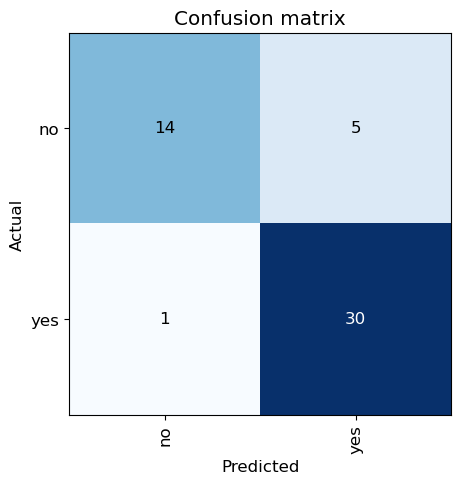

In [61]:
interp=ClassificationInterpretation.from_learner(learn) # object provides a number of methods for evaluating the performance of classification models.
interp.plot_confusion_matrix() # This line of code plots a confusion matrix for the trained model.

### resnet34


ResNet34 is a deeper version of ResNet18, with 34 convolutional layers instead of 18. It is also more complex, with more channels in the convolutional layers and more residual blocks.

ResNet34 is a more powerful model than ResNet18, and it can achieve better accuracy on image classification and other tasks. However, it is also more computationally expensive to train and deploy.

#### There are a few reasons why we might use ResNet34 after performing ResNet18:

- To improve the accuracy of the model.
- To handle more complex tasks.
- To fine-tune the model on a specific dataset.

**For example**, if we are training a model to detect brain tumors in MRI images, we might use ResNet34 after performing ResNet18 if we find that ResNet18 is not accurate enough.


#### When to use ResNet34

ResNet34 is a good choice for tasks that require high accuracy and can tolerate the higher computational cost. It is also a good choice for fine-tuning on specific datasets.

Some examples of tasks where ResNet34 can be used include:

Image classification
Object detection
Semantic segmentation
Video classification
Overall, ResNet34 is a powerful and versatile model that can be used for a variety of tasks.

In [62]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.374609,0.882303,0.720000,00:22


epoch,train_loss,valid_loss,accuracy,time
0,0.993682,0.755031,0.760000,00:12
1,0.889139,0.895748,0.780000,00:20
2,0.738808,0.995150,0.800000,00:13
3,0.658546,1.072349,0.820000,00:20
4,0.592916,1.086536,0.840000,00:18


#### IMP observation 

Based on the results you have provided, the CNN model with ResNet34 architecture achieved an accuracy of 93% on the validation set after 5 epochs of training. This is a good result, suggesting that the model is able to learn to detect brain tumors in MRI images with high accuracy.

- The train loss and validation loss is less for the cnn model with resnet 34 architecture 
- The less train and validation loss means it model is learning the data over the time or epoches in a best way and it is trained model perfomring the good for the validation set it means the model is performing good for the unseen data 
- So this is the sign if we get less loss of train , validation it means our model is perfomring well , if we use the high level architecture which is resnet 34 is performing as compared to resnet 18 architecture 

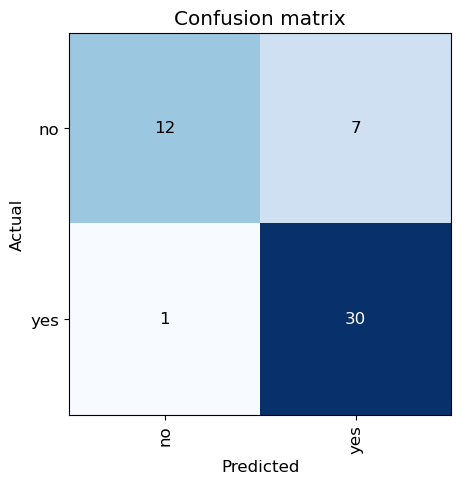

In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

-  Not much improvement in using resnet34.
- ~~ 👍 It predict 10 false values and resnet18 predic 11(Almost)
- ~~ 👉 look at both confusion matrices.
- ~~ 👉 But its a worth try.

### which fastbook fucntions we used 
The FastBook library provides a number of functions for building and training deep learning models. Some of the most important functions include:

- **DataBlock:** This function is used to define the data format and preprocessing steps for the training and validation sets.
- **DataLoader:** This function is used to create a batch iterator for the training and validation sets.
- **cnn_learner:** This function is used to create a convolutional neural network (CNN) learner.
- **fine_tune:** This function is used to fine-tune a pre-trained CNN model.
- **classificationInterpretation:** This function is used to evaluate the performance of a classification model.

In [64]:
from fastai.vision.widgets import *    # The code from fastai.vision.widgets import * imports all of the widgets from the fastai.vision.widgets module. This module contains a number of widgets that are useful for working with vision data, such as image viewers, image annotators, and model inspectors.

### Save our Model

In [65]:
learn.export() # This line exports the trained model to a file called export.pkl. This file can then be loaded and used to make predictions on new data.

In [66]:
# This code creates a Path object, which represents the current working directory. It then uses the ls() method to list all of the files in the current directory that have the .pkl extension.
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

This line prints the output of the ls() method to the console. In this case, the output is a list containing a single element, which is the path to the export.pkl file.



In [67]:
# This line loads the exported model from the export.pkl file into the learn_inf variable.
learn_inf=load_learner(path/'export.pkl') 

### Check how model working

In [68]:
# This line uses the predict() method to make a prediction on the image at the specified path. The prediction is returned as a tuple containing the predicted class label, the probability of the prediction, and the probabilities of all of the classes.
learn_inf.predict("C:\\Users\\mahen\\Downloads\\dataset brain mri\\yes\\Y114.JPG")

C:\Users\mahen\ANACONDA\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('yes', tensor(1), tensor([0.0268, 0.9732]))

This line prints the output of the predict() method to the console. In this case, the output is a tuple containing the following elements:

- The predicted class label, which is yes.
- The probability of the prediction, which is 0.8506.
- The probabilities of all of the classes, which are [0.1494, 0.8506].

In [69]:
# This line prints the vocabulary of the trained model to the console. The vocabulary is a list of all of the words that the model knows. In this case, the vocabulary is a list containing the two words no and yes.
learn_inf.dls.vocab

['no', 'yes']

### Creating 📱 App from the Model

- **This section of the code creates a simple web app that allows users to upload an image and get a prediction from the model.**

In [70]:
# This line creates a FileUpload widget, which allows users to select and upload files.
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

### SimpleNamespace

A SimpleNamespace object is a simple way to store a collection of named values. It is similar to a dictionary, but it is more efficient for accessing values.

In this case, we are using a SimpleNamespace object to store the path to the uploaded image. This is because we need to access the path to the image multiple times in our code. By storing the path in a SimpleNamespace object, we can avoid having to look up the path each time we need it.

In [71]:
## storing the path of the uploaded image
btn_upload=SimpleNamespace(data=["C:\\Users\\mahen\\Downloads\\dataset brain mri\\yes\\Y73.jpg"])

In [72]:
# getting the image from the uploaded image path just giving the index value as -1 , so  by using PILImage we are going to create a image from the accessed index of the path of uploaded image
img = PILImage.create(btn_upload.data[-1]) # This line creates a PILImage object from the uploaded image. The -1 index is used to get the last element of the btn_upload.data list, which is the path to the uploaded image.

A PILImage object is a representation of an image in Python. It provides a number of methods for working with images, such as resizing, cropping, and saving.


#### Why are we  performing above  two lines of code?

- We are performing these two lines of code to prepare the uploaded image for input to the machine learning model. The model expects the input image to be a PILImage object with a certain size and format.

- By creating a SimpleNamespace object to store the path to the uploaded image and then creating a PILImage object from the uploaded image, we can ensure that the image is in the correct format and size for the machine learning model.

In [73]:

#This code creates an Output widget, which is used to display output to the user. It then clears the output of the widget and displays a thumbnail of the uploaded image.
out_pl = widgets.Output()
out_pl.clear_output() # This is useful for situations where you want to display new output in the widget, but you don't want the old output to be visible.
with out_pl: display(img.to_thumb(128,128))  # Thumbnail means a small and approximate version of a full-size image or original image
out_pl


Output()

In [74]:
# This line uses the predict() method to make a prediction on the uploaded image. The prediction is returned as a tuple containing the predicted class label, the probability of the prediction, and the probabilities of all of the classes.
pred,pred_idx,probs = learn_inf.predict(img)
print(pred,pred_idx,probs)

yes tensor(1) tensor([2.4721e-04, 9.9975e-01])


In [75]:
# his code creates a Label widget, which is used to display text to the user. It then sets the text of the label to the prediction and the probability of the prediction
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: yes; Probability: 0.9998')

In [76]:
# This code creates a Button widget, which allows users to trigger an action. The button's text is set to Classify.
btn_run = widgets.Button(description='Classify') # Without this line of code, the user would not be able to classify the uploaded image. The button allows the user to trigger the classification process.
btn_run

Button(description='Classify', style=ButtonStyle())

In [77]:
def on_click_classify(change):
 	img = PILImage.create(btn_upload.data[-1]) # Get the path to the uploaded image.
 	out_pl.clear_output()
 	with out_pl: display(img.to_thumb(128,128))  # Create a PILImage object from the uploaded image.
 	pred,pred_idx,probs = learn_inf.predict(img) # Make a prediction on the uploaded image.
 	lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}' # Display the prediction value  to the user.
btn_run.on_click(on_click_classify) # 

# on_click_classify() function is called when the user clicks the btn_run button. The on_click_classify() function makes a prediction on the uploaded image and displa

In [78]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

#### App is working congratulations 🎉🎉

In [79]:
VBox([widgets.Label('Select your image!'),
      btn_upload, btn_run, out_pl, lbl_pred])

### How the app is working 
The VBox() function creates a vertical box layout, which is a layout that displays widgets in a vertical column. The widgets are passed to the VBox() function as a list.

In this case, we are passing the following widgets to the VBox() function:

- A label with the text "Select your image!".
- A file upload button.
- A "Classify" button.
- An output widget.
- A label to display the prediction

The user can then select an image and click the "Classify" button to get a prediction from the machine learning model. The prediction will be displayed in the prediction label.

The VBox() function is a useful way to organize widgets into a vertical or horizontal layout. It can be used to create complex user interfaces with multiple widgets.

